In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import fuzzywuzzy
import matplotlib.pyplot as plt
from scipy import stats

In [126]:
path = r'C:\Users\aaron\prem_league_analytics\data\ml_analysis\ '

df_fifa = pd.read_csv(path+'fifa.csv')
df_fifa = df_fifa.drop(columns=['Unnamed: 0'])
df_perf = pd.read_csv(path+'perf.csv')
df_perf = df_perf.drop(columns=['Unnamed: 0'])
df_trans = pd.read_csv(path+'trans.csv')
df_trans = df_trans.drop(columns=['Unnamed: 0'])

In [127]:
df_trans['current club'].value_counts()

Sheffield United              33
Everton FC                    29
Brighton & Hove Albion        28
Watford FC                    27
Norwich City                  27
Newcastle United              25
West Ham United               22
Leicester City                22
Aston Villa                   22
Wolverhampton Wanderers       20
Liverpool FC                  20
Manchester City               18
Southampton FC                18
Arsenal FC                    17
Burnley FC                    17
Crystal Palace                16
Manchester United             15
Chelsea FC                    15
AFC Bournemouth               14
Tottenham Hotspur             11
Brighton & Hove Albion U23     3
Cape Verde                     1
Name: current club, dtype: int64

In [128]:
df_perf['current club'].value_counts()

Watford FC                 125
Leicester City             119
Newcastle United           114
Sheffield United           113
AFC Bournemouth            107
Wolverhampton Wanderers    105
Norwich City               104
Tottenham Hotspur          104
West Ham United            100
Everton FC                  99
Manchester United           98
Crystal Palace              98
Burnley FC                  97
Brighton & Hove Albion      96
Southampton FC              96
Liverpool FC                89
Aston Villa                 89
Arsenal FC                  89
Chelsea FC                  87
Manchester City             83
Name: current club, dtype: int64

In [129]:
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [134]:
df = pd.merge(df_trans, df_perf,  on=['name','year','current club'], how = 'outer')
df = df.dropna()
df

,name,age_x,height_x,position_x,current club,date,left,joined,mv,year,short_name_x,age_y,height_y,position_y,games,goals,assists,minutes,short_name_y
1,Nicolás Otamendi,31.0,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,31.0,183.0,W,49.0,1.0,0.0,4268.0,N. Otamendi
2,João Cancelo,25.0,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000.0,15/16,J. Cancelo,25.0,182.0,W,39.0,3.0,5.0,2865.0,J. Cancelo
3,Kevin De Bruyne,28.0,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000.0,15/16,K. De,28.0,181.0,W,45.0,17.0,15.0,3487.0,K. De
4,Raheem Sterling,24.0,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000.0,15/16,R. Sterling,24.0,170.0,W,47.0,11.0,10.0,2981.0,R. Sterling
5,Leroy Sané,23.0,184.0,W,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,4000000.0,15/16,L. Sané,23.0,184.0,W,42.0,9.0,7.0,2925.0,L. Sané
7,Virgil van Dijk,28.0,193.0,W,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,5000000.0,15/16,V. van,28.0,193.0,W,48.0,3.0,0.0,4309.0,V. van
8,Joe Gomez,22.0,188.0,W,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,2000000.0,15/16,J. Gomez,22.0,188.0,W,7.0,0.0,1.0,618.0,J. Gomez
9,Nathaniel Clyne,28.0,175.0,W,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,17000000.0,15/16,N. Clyne,28.0,175.0,W,52.0,2.0,2.0,4661.0,N. Clyne
10,Georginio Wijnaldum,28.0,175.0,W,Liverpool FC,"Jul 11, 2015",PSV Eindhoven,Newcastle,15000000.0,15/16,G. Wijnaldum,28.0,175.0,W,40.0,11.0,5.0,3347.0,G. Wijnaldum
11,James Milner,33.0,175.0,W,Liverpool FC,"Jul 1, 2015",Man City,Liverpool,14000000.0,15/16,J. Milner,33.0,175.0,W,45.0,7.0,14.0,3862.0,J. Milner


In [135]:
df['current club'].value_counts()

Sheffield United           28
Watford FC                 26
Everton FC                 25
Norwich City               25
Brighton & Hove Albion     24
Newcastle United           22
Leicester City             20
Aston Villa                20
West Ham United            20
Wolverhampton Wanderers    18
Liverpool FC               17
Arsenal FC                 15
Southampton FC             15
Manchester City            15
Crystal Palace             14
Chelsea FC                 14
Manchester United          13
AFC Bournemouth            12
Burnley FC                 12
Tottenham Hotspur           9
Name: current club, dtype: int64

In [87]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in df_fifa.short_name:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df.name, 75)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"fifa name" : name})
    dict_.update({"transfermarkt name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table.head()

,fifa name,transfermarkt name,score
0,K. De Bruyne,Kevin De Bruyne,81
1,V. van Dijk,Virgil van Dijk,77
2,M. Salah,,-1
3,H. Kane,,-1
4,Alisson,,-1


In [92]:
merge_table = merge_table[merge_table.score != -1]

In [94]:
merge_table['score'].value_counts()

78     71
76     65
82     60
80     55
100    50
77     32
83     29
81     24
79     17
86     13
84     11
85      6
91      5
88      5
87      3
Name: score, dtype: int64

In [95]:
merge_table.head()

,fifa name,transfermarkt name,score
0,K. De Bruyne,Kevin De Bruyne,81
1,V. van Dijk,Virgil van Dijk,77
8,P. Pogba,Paul Pogba,78
10,R. Sterling,Raheem Sterling,77
17,Bernardo Silva,Bernardo Silva,100


In [96]:
df_merged = pd.merge(df, merge_table,  how='left', left_on=['name'], right_on = ['transfermarkt name'])
df_merged = df_merged.dropna()
df_merged

,name,age,height,position,current club,date,left,joined,mv,year,short_name,games,goals,assists,minutes,fifa name,transfermarkt name,score
1,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000,15/16,J. Cancelo,39.0,3.0,5.0,2865.0,João Cancelo,João Cancelo,100.0
2,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De,45.0,17.0,15.0,3487.0,K. De Bruyne,Kevin De Bruyne,81.0
3,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De,45.0,17.0,15.0,3487.0,K. De Bruyne,Kevin De Bruyne,81.0
4,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De,45.0,17.0,15.0,3487.0,K. De Bruyne,Kevin De Bruyne,81.0
5,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De,45.0,17.0,15.0,3487.0,K. De Bruyne,Kevin De Bruyne,81.0
6,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De,45.0,17.0,15.0,3487.0,K. De Bruyne,Kevin De Bruyne,81.0
7,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling,47.0,11.0,10.0,2981.0,R. Sterling,Raheem Sterling,77.0
8,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling,47.0,11.0,10.0,2981.0,R. Sterling,Raheem Sterling,77.0
9,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling,47.0,11.0,10.0,2981.0,R. Sterling,Raheem Sterling,77.0
10,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling,47.0,11.0,10.0,2981.0,R. Sterling,Raheem Sterling,77.0


In [99]:
df_merged_all = pd.merge(df_merged, df_fifa,  how='left', left_on=['fifa name', 'year'], right_on = ['short_name', 'year'])
df_merged_all = df_merged_all.dropna()
df_merged_all

,name,age,height,position,current club,date,left,joined,mv,year,...,minutes,fifa name,transfermarkt name,score,short_name_y,overall,club,value_eur,wage_eur,player_positions
1,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,...,3487.0,K. De Bruyne,Kevin De Bruyne,81.0,K. De Bruyne,86.0,Manchester City,50500000.0,190000.0,"CAM, LM, RM"
2,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,...,3487.0,K. De Bruyne,Kevin De Bruyne,81.0,K. De Bruyne,86.0,Manchester City,50500000.0,190000.0,"CAM, LM, RM"
3,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,...,3487.0,K. De Bruyne,Kevin De Bruyne,81.0,K. De Bruyne,86.0,Manchester City,50500000.0,190000.0,"CAM, LM, RM"
4,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,...,3487.0,K. De Bruyne,Kevin De Bruyne,81.0,K. De Bruyne,86.0,Manchester City,50500000.0,190000.0,"CAM, LM, RM"
5,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,...,3487.0,K. De Bruyne,Kevin De Bruyne,81.0,K. De Bruyne,86.0,Manchester City,50500000.0,190000.0,"CAM, LM, RM"
6,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,...,2981.0,R. Sterling,Raheem Sterling,77.0,R. Sterling,82.0,Manchester City,27000000.0,110000.0,"LM, ST, RM"
7,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,...,2981.0,R. Sterling,Raheem Sterling,77.0,R. Sterling,82.0,Manchester City,27000000.0,110000.0,"LM, ST, RM"
8,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,...,2981.0,R. Sterling,Raheem Sterling,77.0,R. Sterling,82.0,Manchester City,27000000.0,110000.0,"LM, ST, RM"
9,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,...,2981.0,R. Sterling,Raheem Sterling,77.0,R. Sterling,82.0,Manchester City,27000000.0,110000.0,"LM, ST, RM"
10,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,...,2981.0,R. Sterling,Raheem Sterling,77.0,R. Sterling,82.0,Manchester City,27000000.0,110000.0,"LM, ST, RM"


In [100]:
df_merged_all['current club'].value_counts()

Watford FC                 65
Sheffield United           57
Everton FC                 46
Liverpool FC               35
Aston Villa                31
Manchester City            29
Burnley FC                 24
Southampton FC             24
Manchester United          22
Leicester City             22
Brighton & Hove Albion     21
Arsenal FC                 17
Chelsea FC                 16
Norwich City               16
Wolverhampton Wanderers    15
Crystal Palace             10
Newcastle United            7
AFC Bournemouth             7
Tottenham Hotspur           6
Name: current club, dtype: int64

In [53]:
order_goals = df_merged.groupby(by=['current club'])['goals'].median().sort_values(ascending=False).index

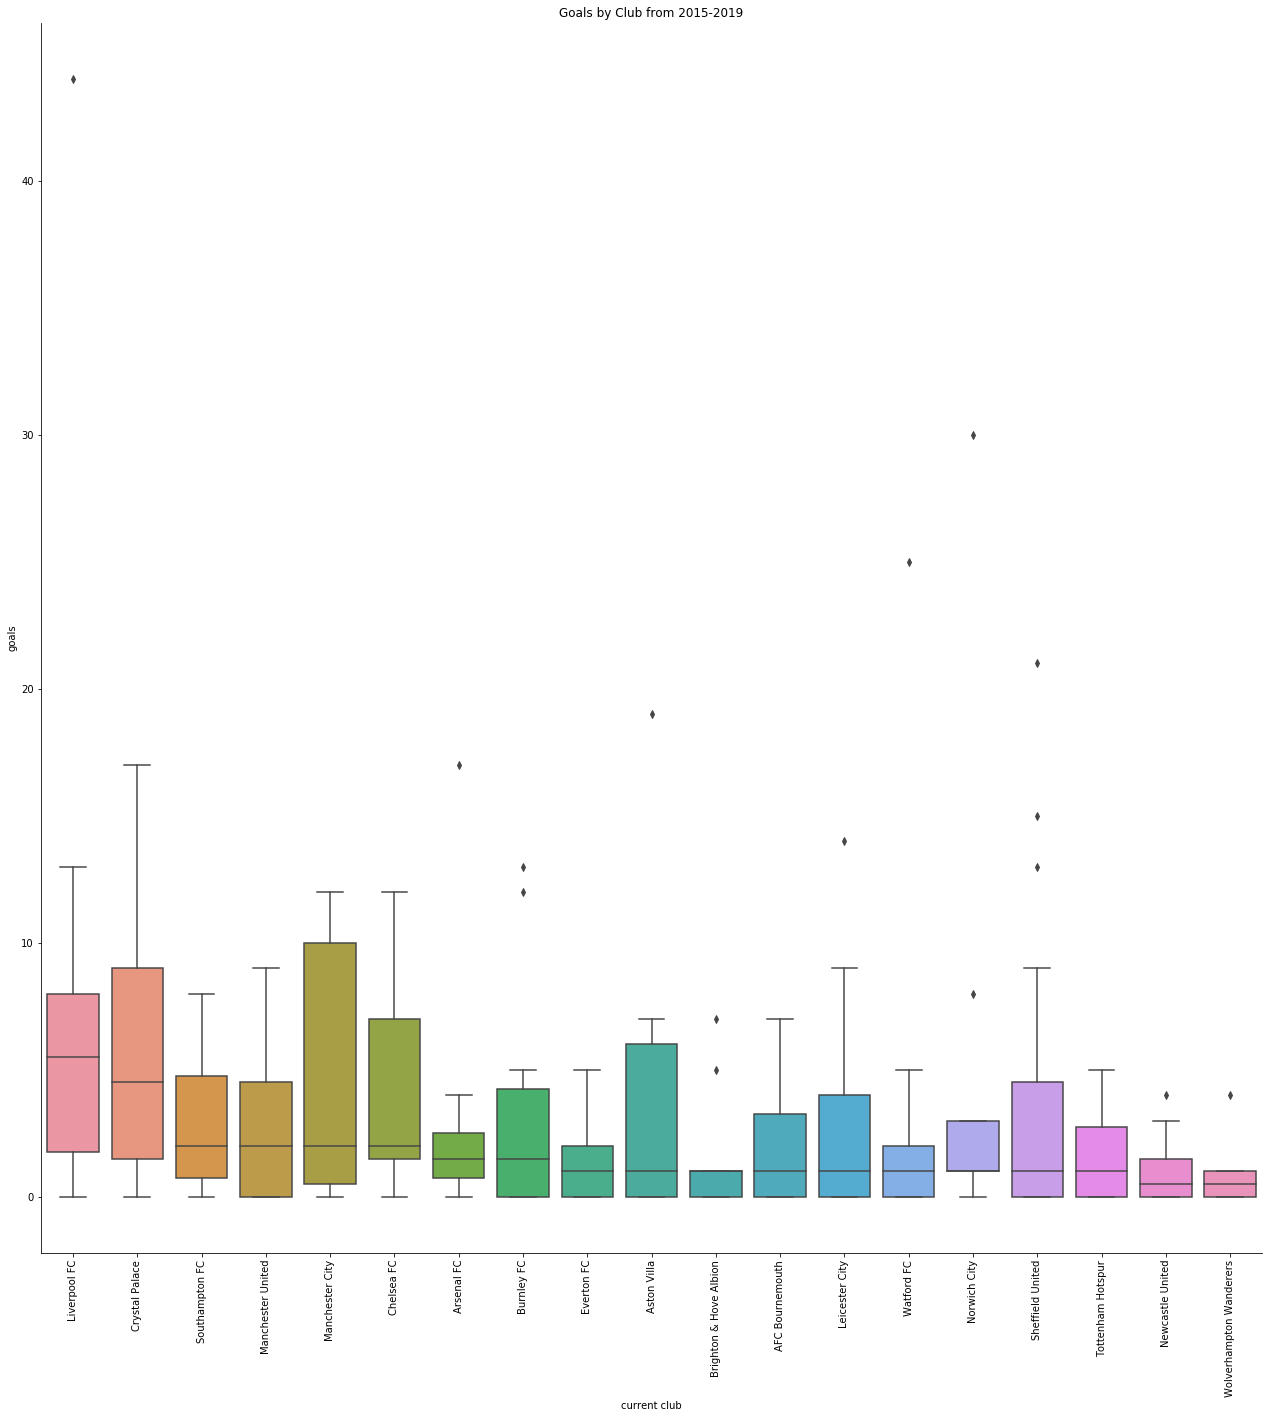

In [54]:
#Historical trends from 
ax=sns.catplot(x="current club", y="goals", kind="box", order=order_goals, data=df_merged)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Goals by Club from 2015-2019')
plt.show()